<a href="https://colab.research.google.com/github/mmbs1989/DSWP-Aluno/blob/main/TCCfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostccdata.csv")
dfa = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostcca.csv")
df = df.drop(df.index[314:])
dfa = dfa.drop(dfa.index[314:])
df['a'] = dfa['a']
df['a'] = pd.to_numeric(df['a'])
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)


In [105]:
df.tail(30)

,y
ds,
2017-09-01,105595
2017-10-01,121144
2017-11-01,115089
2017-12-01,137842
2018-01-01,155619
2018-02-01,105122
2018-03-01,105659
2018-04-01,130806
2018-05-01,106192


In [95]:
df.dtypes

y    int64
dtype: object

In [96]:
print(df.shape)

(316, 1)


In [97]:
df.describe()

,y
count,316.000000
mean,54334.367089
std,42312.262617
min,4343.000000
25%,15019.500000
50%,45845.000000
75%,91577.000000
max,174991.000000


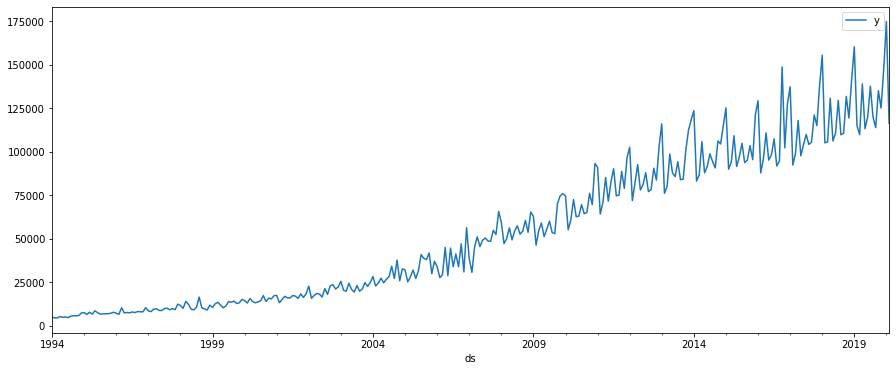

In [104]:
df.plot(figsize=(15,6))

In [106]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

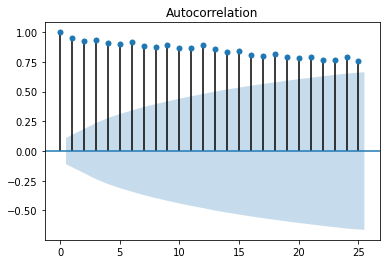

In [107]:
plot_acf(df)
plt.show()

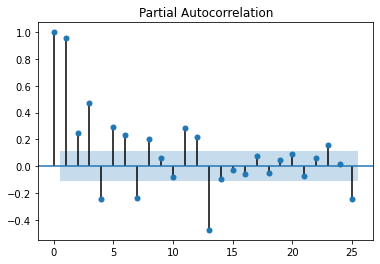

In [108]:
plot_pacf(df)
plt.show()

In [116]:
n = len(df)
print(n)
train_size = int(2/3*n)
print(train_size)

314
209


In [119]:
train_set = df[:train_size]
test_set = df[train_size:]
test_set

,y
ds,
2011-06-01,82726
2011-07-01,90247
2011-08-01,74607
2011-09-01,75100
2011-10-01,88737
...,...
2019-10-01,135202
2019-11-01,125161
2019-12-01,147501


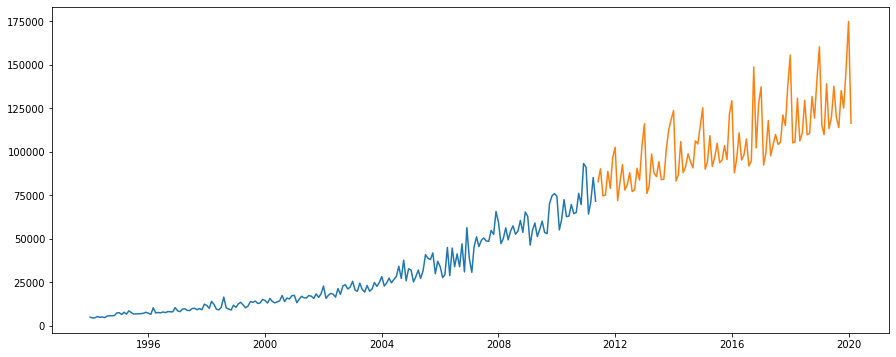

In [120]:
plt.figure(figsize=(15,6))
plt.plot(train_set)
plt.plot(test_set)

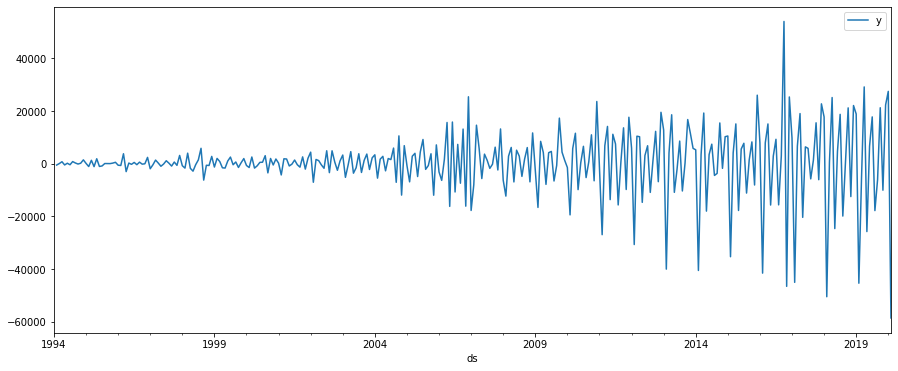

In [109]:
df.diff().plot(figsize=(15,6))

In [110]:
from statsmodels.tsa.arima_model import ARIMA

In [122]:
arimatrain = ARIMA(train_set, freq='MS', order=(5,1,2)).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [123]:
arimatest = ARIMA(test_set, freq='MS', order=(5,1,2)).fit(arimatrain.params)
(arimatest.resid**2).mean()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: Converge

139265826.6914836

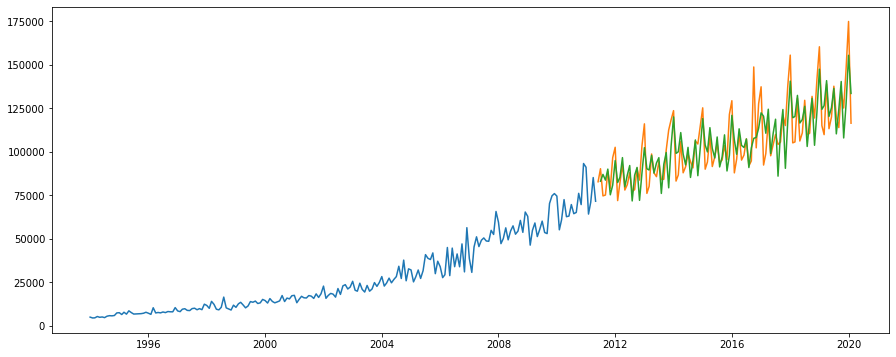

In [126]:
plt.figure(figsize=(15,6))
plt.plot(train_set)
plt.plot(test_set)
plt.plot(arimatest.predict(typ='levels'))

In [112]:
arima = ARIMA(df, freq='MS', order=(5,1,2)).fit()
(arima.resid ** 2).mean()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


53729356.563970715

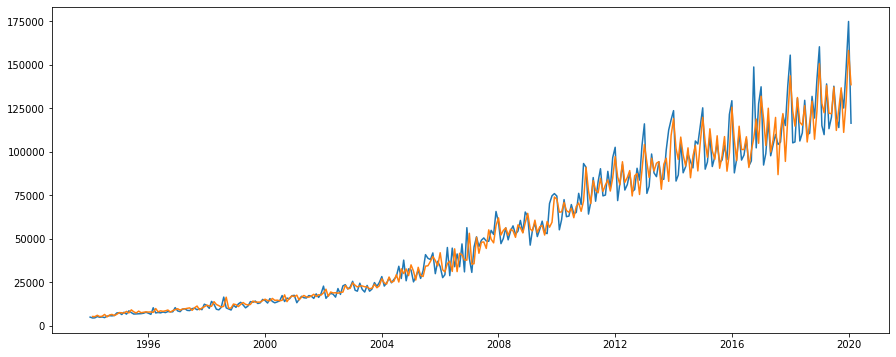

In [113]:
plt.figure(figsize=(15,6))
plt.plot(df)
plt.plot(arima.predict(typ='levels'))